# **LOGISTIC REGRESSION**

Overview
*   This lab assignment focuses on implementing Logistic Regression to predict loan defaults using the Loan Default Prediction Dataset.
*   You will develop models perform **Logistic Regression** on Loan Default Prediction Dataset datasets using **Gradient Descent** method to identify high-risk individuals, allowing for timely interventions in financial loan services.


# **DATASET**


1.  **Source:** Loan Default Prediction [Dataset](https://www.kaggle.com/datasets/nikhil1e9/loan-default)
2.   **Size:** 255,347 rows and 18 columns

**Purpose:** Predict the likelihood of loan default




**TASK 1**:



1. Preprocess the data








In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('Loan_default.csv')

In [ ]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
df.shape

(255347, 18)

In [ ]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
df.describe(include='object')

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347,255347
unique,255347,4,4,3,2,2,5,2
top,I38PQUQS96,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,1,64366,64161,85302,127677,127742,51298,127701


In [ ]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


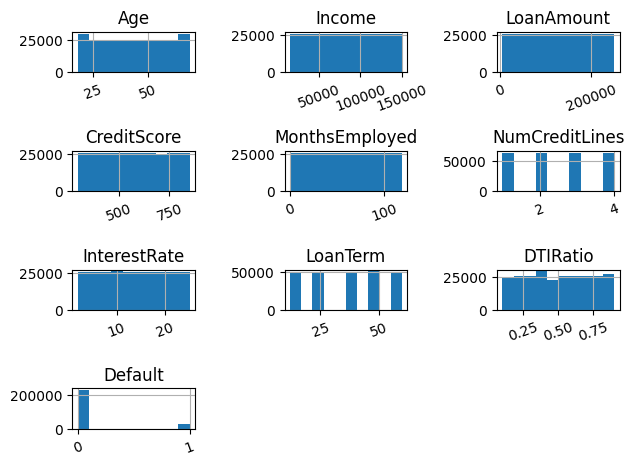

In [ ]:
df.hist(xrot=20)
plt.tight_layout()
plt.show()

In [ ]:
df.drop('LoanID', axis=1, inplace=True)

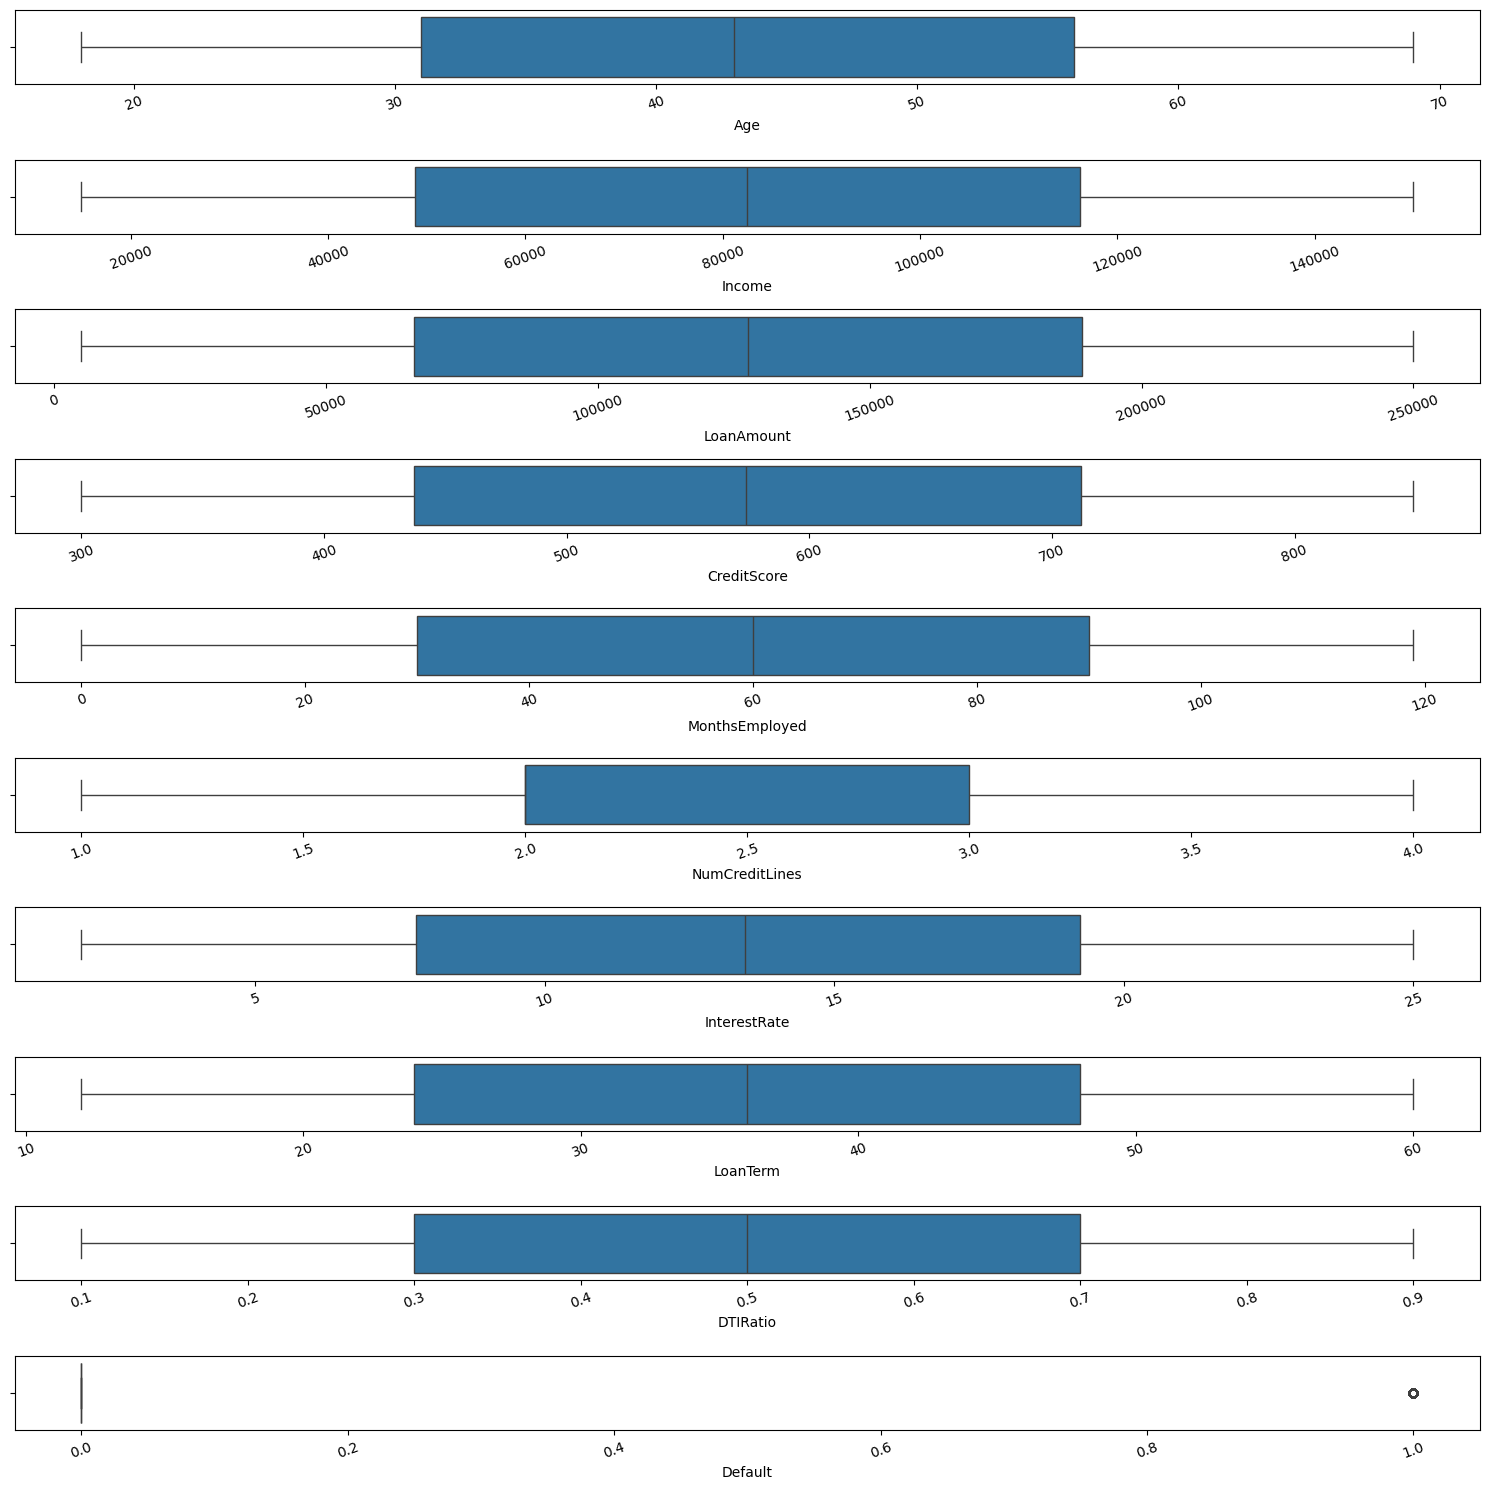

In [ ]:
numeric_columns=[]
for column in df.columns:
  if df[column].dtype!='object':
    numeric_columns.append(column)

plt.figure(figsize=(15,15))
for i,col in enumerate(numeric_columns,1):
  plt.subplot(len(numeric_columns),1,i)
  sns.boxplot(data=df,x=col)
  plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

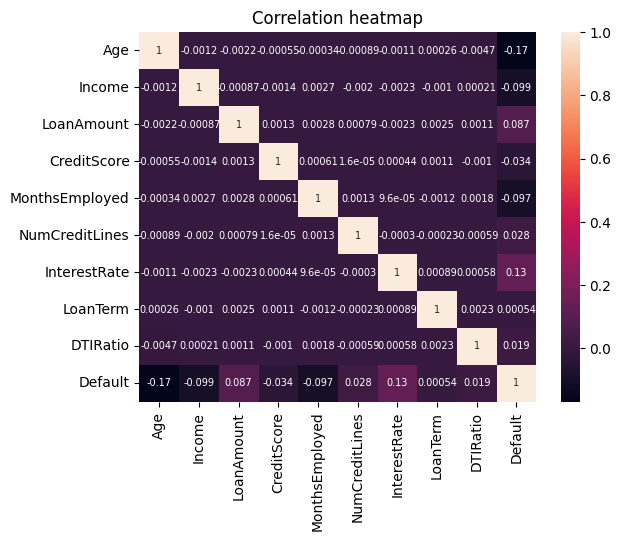

In [ ]:
numeric_features=df.select_dtypes(include=np.number)
sns.heatmap(numeric_features.corr(),annot=True,annot_kws={'fontsize':7})
plt.title('Correlation heatmap')
plt.show()

In [ ]:
categorical_features=df.select_dtypes(include='object')
categorical_features.columns

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [ ]:
dummy_categorical_features=pd.get_dummies(categorical_features,drop_first=True,dtype=int)
dummy_categorical_features.head()

,Education_High School,Education_Master's,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
2,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features.drop('Default',axis=1))
numeric_features_scaled = pd.DataFrame(numeric_features_scaled, columns=numeric_features.drop('Default',axis=1).columns)
numeric_features_scaled['Default'] = df['Default']

In [ ]:
data=pd.concat([numeric_features_scaled,dummy_categorical_features],axis=1)
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,0,...,0,0,0,1,1,0,0,0,1,1
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,0,...,0,1,0,0,0,0,0,0,1,1
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,1,...,1,0,0,1,1,0,0,0,0,0
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,0,...,0,1,0,0,0,1,0,0,0,0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
data.shape

(255347, 25)

In [ ]:
vif_data=pd.DataFrame()
vif_data['features']=data.drop('Default',axis=1).columns
vif_data['VIF']=[variance_inflation_factor(data.drop('Default',axis=1).values,i) for i in range(len(data.drop('Default',axis=1).columns))]
print(vif_data)

                        features       VIF
0                            Age  3.608947
1                         Income  3.698478
2                     LoanAmount  3.701286
3                    CreditScore  3.688193
4                 MonthsEmployed  3.673622
5                 NumCreditLines  2.682804
6                   InterestRate  3.701422
7                       LoanTerm  2.858540
8                       DTIRatio  3.711213
9          Education_High School  1.893084
10            Education_Master's  1.890816
11                 Education_PhD  1.889622
12      EmploymentType_Part-time  1.907333
13  EmploymentType_Self-employed  1.903364
14     EmploymentType_Unemployed  1.906354
15         MaritalStatus_Married  1.927091
16          MaritalStatus_Single  1.923670
17               HasMortgage_Yes  1.950654
18             HasDependents_Yes  1.952799
19          LoanPurpose_Business  1.881804
20         LoanPurpose_Education  1.877114
21              LoanPurpose_Home  1.881698
22         

# **TASK 2**:

# **Data Splitting:**

# **Implement the following data splitting strategies:**

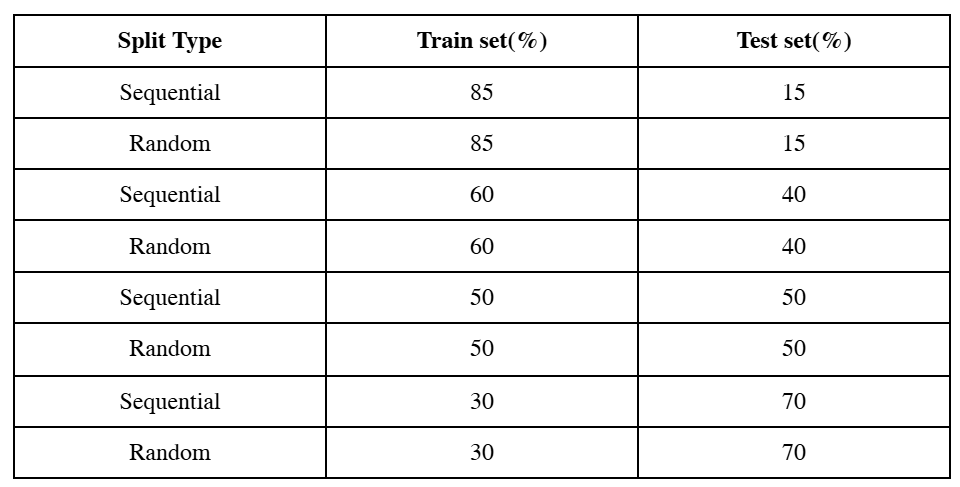

In [ ]:
x=data.drop('Default',axis=1)
y=data['Default']
x=sm.add_constant(x)

In [ ]:
x_train_1s,x_test_1s,y_train_1s,y_test_1s=train_test_split(x,y,test_size=0.15,shuffle=False)
x_train_1r,x_test_1r,y_train_1r,y_test_1r=train_test_split(x,y,test_size=0.15,random_state=12)

In [ ]:
x_train_1s.shape

(217044, 25)

In [ ]:
x_test_1s.shape

(38303, 25)

In [ ]:
x_train_2s,x_test_2s,y_train_2s,y_test_2s=train_test_split(x,y,test_size=0.4,shuffle=False)
x_train_2r,x_test_2r,y_train_2r,y_test_2r=train_test_split(x,y,test_size=0.4,random_state=12)

In [ ]:
x_train_3s,x_test_3s,y_train_3s,y_test_3s=train_test_split(x,y,test_size=0.5,shuffle=False)
x_train_3r,x_test_3r,y_train_3r,y_test_3r=train_test_split(x,y,test_size=0.5,random_state=12)

In [ ]:
x_train_4s,x_test_4s,y_train_4s,y_test_4s=train_test_split(x,y,test_size=0.7,shuffle=False)
x_train_4r,x_test_4r,y_train_4r,y_test_4r=train_test_split(x,y,test_size=0.7,random_state=12)

# **TASK 3**
# Gradient Descent Implementations

Implement using: Implement three variants of Gradient Descent:

• SGD (Stochastic Gradient Descent)

•	GD (Gradient Descent)

•	BGD (Batch Gradient Descent)

Important Notes:
1.  Implement the update rules manually without using built-in functions
2.  Experiment with different learning rates and epochs
1.   Analyze the impact of these hyperparameters on model performance


In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def compute_loss(y,y_pred):
  return -np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))

In [ ]:
def compute_gradient(x,y,theta):
  m=len(y)
  y_pred=sigmoid(np.dot(x,theta))
  return (1/m)*np.dot(x.T,(y_pred-y))

In [ ]:
def sgd(x,y,alpha=0.01,epochs=100):
  n,m=x.shape
  theta=np.zeros(m)
  loss_history=[]
  for epoch in range(epochs):
    random_index=np.random.randint(n)
    x_i=x.iloc[random_index, : ].values.reshape(1,-1)
    y_i=y.iloc[random_index]
    y_pred=sigmoid(np.dot(x_i,theta))
    gradient=np.dot(x_i.T,(y_pred-y_i))
    theta=theta-alpha*gradient
    loss_history.append(compute_loss(y,sigmoid(np.dot(x,theta))))
  return theta,loss_history

In [ ]:
def gd(x,y,alpha=0.01,epochs=100):
  n,m=x.shape
  theta=np.zeros(m)
  loss_history=[]
  for i in range(epochs):
    gradient=compute_gradient(x,y,theta)
    theta-=alpha*gradient
    loss=compute_loss(y,sigmoid(np.dot(x,theta)))
    loss_history.append(loss)
  return theta,loss_history

In [ ]:
def bgd(x,y,alpha=0.01,epochs=100,batch_size=10):
  n,m=x.shape
  theta=np.zeros(m)
  loss_history=[]
  for epochs in range(epochs):
    x_batch=x[i:i+batch_size]
    y_batch=y[i:i+batch_size]
    gradient=compute_gradient(x_batch,y_batch,theta)
    theta-=alpha*gradient
    loss_history.append(compute_loss(y,sigmoid(np.dot(x,theta))))
  return theta,loss_history

In [ ]:
theta_sgd_1s_11,loss_history_sgd_1s_11=sgd(x_train_1s,y_train_1s,alpha=0.1,epochs=100)
theta_sgd_1s_12,loss_history_sgd_1s_12=sgd(x_train_1s,y_train_1s,alpha=0.01,epochs=100)
theta_sgd_1s_13,loss_history_sgd_1s_13=sgd(x_train_1s,y_train_1s,alpha=0.001,epochs=100)
theta_sgd_1s_14,loss_history_sgd_1s_14=sgd(x_train_1s,y_train_1s,alpha=0.5,epochs=100)

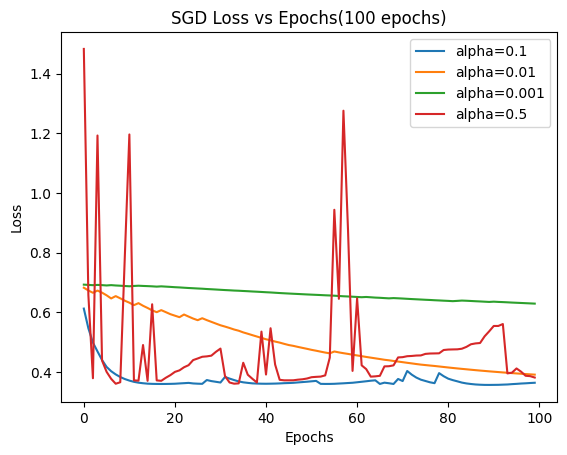

In [ ]:
plt.plot(loss_history_sgd_1s_11,label='alpha=0.1')
plt.plot(loss_history_sgd_1s_12,label='alpha=0.01')
plt.plot(loss_history_sgd_1s_13,label='alpha=0.001')
plt.plot(loss_history_sgd_1s_14,label='alpha=0.5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD Loss vs Epochs(100 epochs)')
plt.legend()

In [ ]:
theta_sgd_1s_21,loss_history_sgd_1s_21=sgd(x_train_1s,y_train_1s,alpha=0.1,epochs=500)
theta_sgd_1s_22,loss_history_sgd_1s_22=sgd(x_train_1s,y_train_1s,alpha=0.01,epochs=500)
theta_sgd_1s_23,loss_history_sgd_1s_23=sgd(x_train_1s,y_train_1s,alpha=0.001,epochs=500)
theta_sgd_1s_24,loss_history_sgd_1s_24=sgd(x_train_1s,y_train_1s,alpha=0.5,epochs=500)

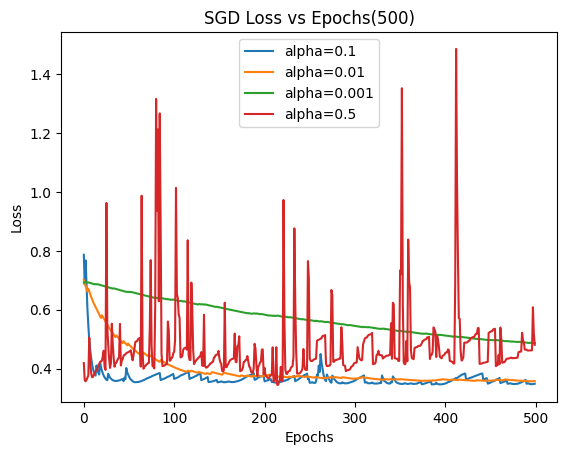

In [ ]:
plt.plot(loss_history_sgd_1s_21,label='alpha=0.1')
plt.plot(loss_history_sgd_1s_22,label='alpha=0.01')
plt.plot(loss_history_sgd_1s_23,label='alpha=0.001')
plt.plot(loss_history_sgd_1s_24,label='alpha=0.5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD Loss vs Epochs(500)')
plt.legend()

In [ ]:
theta_sgd_1s_31,loss_history_sgd_1s_31=sgd(x_train_1s,y_train_1s,alpha=0.1,epochs=1000)
theta_sgd_1s_32,loss_history_sgd_1s_32=sgd(x_train_1s,y_train_1s,alpha=0.01,epochs=1000)
theta_sgd_1s_33,loss_history_sgd_1s_33=sgd(x_train_1s,y_train_1s,alpha=0.001,epochs=1000)
theta_sgd_1s_34,loss_history_sgd_1s_34=sgd(x_train_1s,y_train_1s,alpha=0.5,epochs=1000)

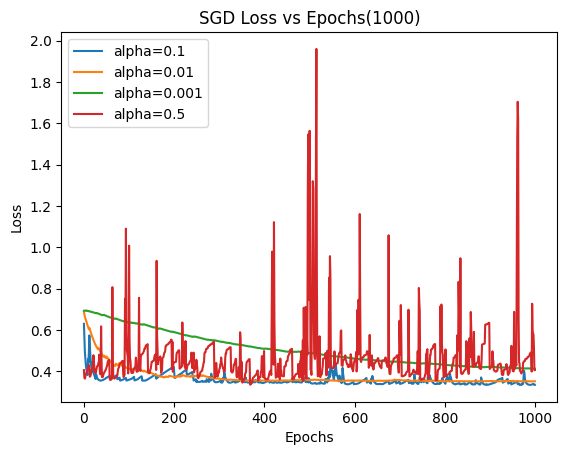

In [ ]:
plt.plot(loss_history_sgd_1s_31,label='alpha=0.1')
plt.plot(loss_history_sgd_1s_32,label='alpha=0.01')
plt.plot(loss_history_sgd_1s_33,label='alpha=0.001')
plt.plot(loss_history_sgd_1s_34,label='alpha=0.5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD Loss vs Epochs(1000)')
plt.legend()

In [ ]:
theta_sgd_1s,loss_history_sgd_1s=sgd(x_train_1s,y_train_1s,alpha=0.01,epochs=500)
theta_sgd_1r,loss_history_sgd_1r=sgd(x_train_1r,y_train_1r,alpha=0.01,epochs=500)
theta_sgd_2s,loss_history_sgd_2s=sgd(x_train_2s,y_train_2s,alpha=0.01,epochs=500)
theta_sgd_2r,loss_history_sgd_2r=sgd(x_train_2r,y_train_2r,alpha=0.01,epochs=500)
theta_sgd_3s,loss_history_sgd_3s=sgd(x_train_3s,y_train_3s,alpha=0.01,epochs=500)
theta_sgd_3r,loss_history_sgd_3r=sgd(x_train_3r,y_train_3r,alpha=0.01,epochs=500)
theta_sgd_4s,loss_history_sgd_4s=sgd(x_train_4s,y_train_4s,alpha=0.01,epochs=500)
theta_sgd_4r,loss_history_sgd_4r=sgd(x_train_4r,y_train_4r,alpha=0.01,epochs=500)

In [ ]:
theta_gd_1s_11,loss_history_gd_1s_11=gd(x_train_1s,y_train_1s,alpha=0.1,epochs=100)
theta_gd_1s_12,loss_history_gd_1s_12=gd(x_train_1s,y_train_1s,alpha=0.01,epochs=100)
theta_gd_1s_13,loss_history_gd_1s_13=gd(x_train_1s,y_train_1s,alpha=0.001,epochs=100)
theta_gd_1s_14,loss_history_gd_1s_14=gd(x_train_1s,y_train_1s,alpha=0.5,epochs=100)

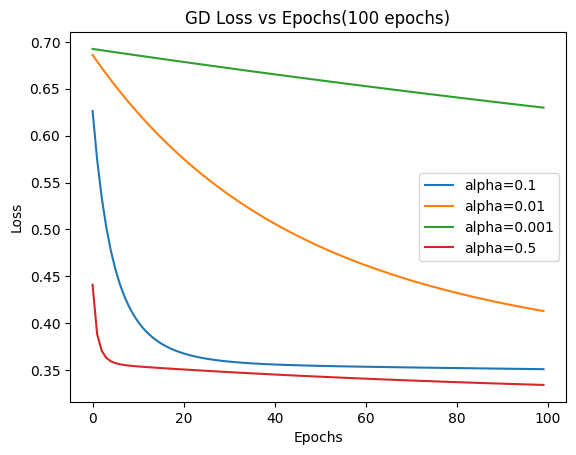

In [ ]:
plt.plot(loss_history_gd_1s_11,label='alpha=0.1')
plt.plot(loss_history_gd_1s_12,label='alpha=0.01')
plt.plot(loss_history_gd_1s_13,label='alpha=0.001')
plt.plot(loss_history_gd_1s_14,label='alpha=0.5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('GD Loss vs Epochs(100 epochs)')
plt.legend()

In [ ]:
theta_gd_1s_21,loss_history_gd_1s_21=gd(x_train_1s,y_train_1s,alpha=0.1,epochs=500)
theta_gd_1s_22,loss_history_gd_1s_22=gd(x_train_1s,y_train_1s,alpha=0.01,epochs=500)
theta_gd_1s_23,loss_history_gd_1s_23=gd(x_train_1s,y_train_1s,alpha=0.001,epochs=500)
theta_gd_1s_24,loss_history_gd_1s_24=gd(x_train_1s,y_train_1s,alpha=0.5,epochs=500)

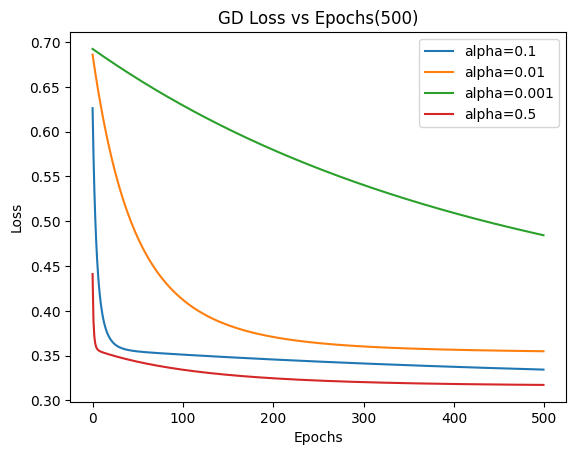

In [ ]:
plt.plot(loss_history_gd_1s_21,label='alpha=0.1')
plt.plot(loss_history_gd_1s_22,label='alpha=0.01')
plt.plot(loss_history_gd_1s_23,label='alpha=0.001')
plt.plot(loss_history_gd_1s_24,label='alpha=0.5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('GD Loss vs Epochs(500)')
plt.legend()

In [ ]:
theta_gd_1s,loss_history_gd_1s=gd(x_train_1s,y_train_1s,alpha=0.5,epochs=100)
theta_gd_1r,loss_history_gd_1r=gd(x_train_1r,y_train_1r,alpha=0.5,epochs=100)
theta_gd_2s,loss_history_gd_2s=gd(x_train_2s,y_train_2s,alpha=0.5,epochs=100)
theta_gd_2r,loss_history_gd_2r=gd(x_train_2r,y_train_2r,alpha=0.5,epochs=100)
theta_gd_3s,loss_history_gd_3s=gd(x_train_3s,y_train_3s,alpha=0.5,epochs=100)
theta_gd_3r,loss_history_gd_3r=gd(x_train_3r,y_train_3r,alpha=0.5,epochs=100)
theta_gd_4s,loss_history_gd_4s=gd(x_train_4s,y_train_4s,alpha=0.5,epochs=100)
theta_gd_4r,loss_history_gd_4r=gd(x_train_4r,y_train_4r,alpha=0.5,epochs=100)

In [ ]:
theta_bgd_1s_11,loss_history_bgd_1s_11=bgd(x_train_1s,y_train_1s,alpha=0.1,epochs=100)
theta_bgd_1s_12,loss_history_bgd_1s_12=bgd(x_train_1s,y_train_1s,alpha=0.01,epochs=100)
theta_bgd_1s_13,loss_history_bgd_1s_13=bgd(x_train_1s,y_train_1s,alpha=0.001,epochs=100)
theta_bgd_1s_14,loss_history_bgd_1s_14=bgd(x_train_1s,y_train_1s,alpha=0.5,epochs=100)

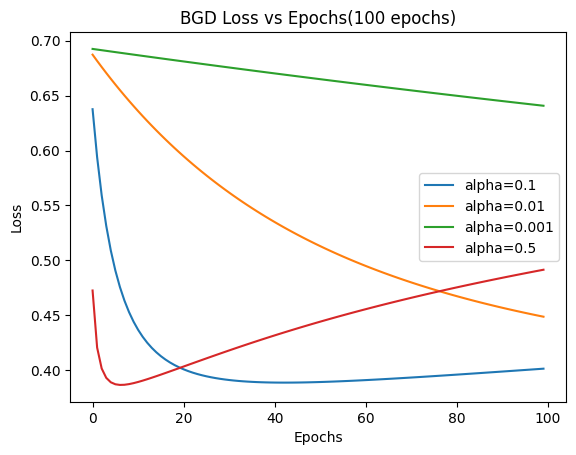

In [ ]:
plt.plot(loss_history_bgd_1s_11,label='alpha=0.1')
plt.plot(loss_history_bgd_1s_12,label='alpha=0.01')
plt.plot(loss_history_bgd_1s_13,label='alpha=0.001')
plt.plot(loss_history_bgd_1s_14,label='alpha=0.5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('BGD Loss vs Epochs(100 epochs)')
plt.legend()

In [ ]:
theta_bgd_1s_21,loss_history_bgd_1s_21=bgd(x_train_1s,y_train_1s,alpha=0.1,epochs=500)
theta_bgd_1s_22,loss_history_bgd_1s_22=bgd(x_train_1s,y_train_1s,alpha=0.01,epochs=500)
theta_bgd_1s_23,loss_history_bgd_1s_23=bgd(x_train_1s,y_train_1s,alpha=0.001,epochs=500)
theta_bgd_1s_24,loss_history_bgd_1s_24=bgd(x_train_1s,y_train_1s,alpha=0.5,epochs=500)

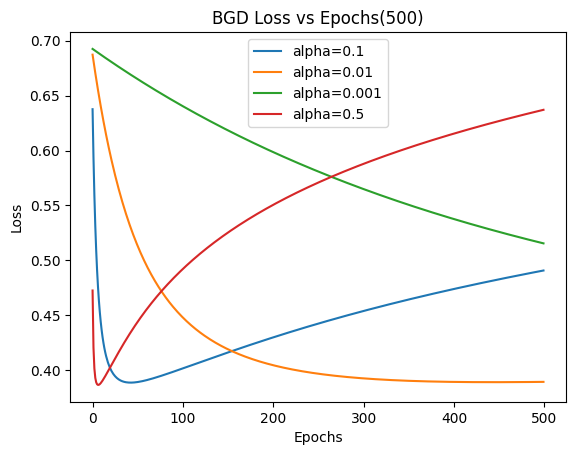

In [ ]:
plt.plot(loss_history_bgd_1s_21,label='alpha=0.1')
plt.plot(loss_history_bgd_1s_22,label='alpha=0.01')
plt.plot(loss_history_bgd_1s_23,label='alpha=0.001')
plt.plot(loss_history_bgd_1s_24,label='alpha=0.5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('BGD Loss vs Epochs(500)')
plt.legend()

In [ ]:
theta_bgd_1s,loss_history_bgd_1s=bgd(x_train_1s,y_train_1s,alpha=0.01,epochs=350)
theta_bgd_1r,loss_history_bgd_1r=bgd(x_train_1r,y_train_1r,alpha=0.01,epochs=350)
theta_bgd_2s,loss_history_bgd_2s=bgd(x_train_2s,y_train_2s,alpha=0.01,epochs=350)
theta_bgd_2r,loss_history_bgd_2r=bgd(x_train_2r,y_train_2r,alpha=0.01,epochs=350)
theta_bgd_3s,loss_history_bgd_3s=bgd(x_train_3s,y_train_3s,alpha=0.01,epochs=350)
theta_bgd_3r,loss_history_bgd_3r=bgd(x_train_3r,y_train_3r,alpha=0.01,epochs=350)
theta_bgd_4s,loss_history_bgd_4s=bgd(x_train_4s,y_train_4s,alpha=0.01,epochs=350)
theta_bgd_4r,loss_history_bgd_4r=bgd(x_train_4r,y_train_4r,alpha=0.01,epochs=350)

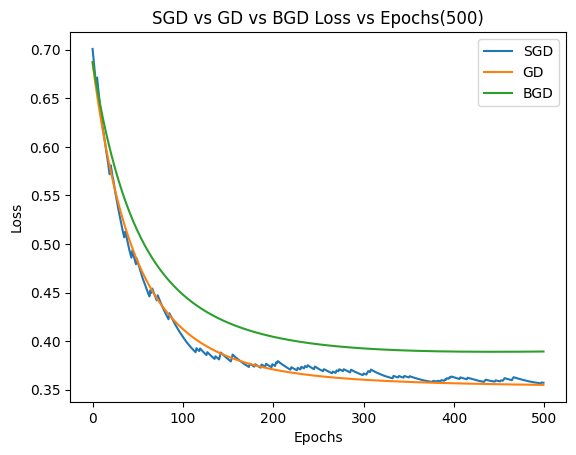

In [ ]:
plt.plot(loss_history_sgd_1s_22,label='SGD')
plt.plot(loss_history_gd_1s_22,label='GD')
plt.plot(loss_history_bgd_1s_22,label='BGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs GD vs BGD Loss vs Epochs(500)')
plt.legend()

# **TASK 4**:
  **Result Compilation**

NOTE:
1.  Test the models on the designated test sets
2.  Evaluate model accuracy using confusion matrices
1.   Create a comprehensive table summarizing results for all cases

In [ ]:
def predict(x,theta):
  p=sigmoid(np.dot(x,theta))
  return np.where(p>=0.2,1,0)

In [ ]:
y_pred_sgd_1s=predict(x_test_1s,theta_sgd_1s)
y_pred_sgd_1r=predict(x_test_1r,theta_sgd_1r)
y_pred_sgd_2s=predict(x_test_2s,theta_sgd_2s)
y_pred_sgd_2r=predict(x_test_2r,theta_sgd_2r)
y_pred_sgd_3s=predict(x_test_3s,theta_sgd_3s)
y_pred_sgd_3r=predict(x_test_3r,theta_sgd_3r)
y_pred_sgd_4s=predict(x_test_4s,theta_sgd_4s)
y_pred_sgd_4r=predict(x_test_4r,theta_sgd_4r)

In [ ]:
y_pred_gd_1s=predict(x_test_1s,theta_gd_1s)
y_pred_gd_1r=predict(x_test_1r,theta_gd_1r)
y_pred_gd_2s=predict(x_test_2s,theta_gd_2s)
y_pred_gd_2r=predict(x_test_2r,theta_gd_2r)
y_pred_gd_3s=predict(x_test_3s,theta_gd_3s)
y_pred_gd_3r=predict(x_test_3r,theta_gd_3r)
y_pred_gd_4s=predict(x_test_4s,theta_gd_4s)
y_pred_gd_4r=predict(x_test_4r,theta_gd_4r)

In [ ]:
y_pred_bgd_1s=predict(x_test_1s,theta_bgd_1s)
y_pred_bgd_1r=predict(x_test_1r,theta_bgd_1r)
y_pred_bgd_2s=predict(x_test_2s,theta_bgd_2s)
y_pred_bgd_2r=predict(x_test_2r,theta_bgd_2r)
y_pred_bgd_3s=predict(x_test_3s,theta_bgd_3s)
y_pred_bgd_3r=predict(x_test_3r,theta_bgd_3r)
y_pred_bgd_4s=predict(x_test_4s,theta_bgd_4s)
y_pred_bgd_4r=predict(x_test_4r,theta_bgd_4r)

In [ ]:
columns = ["Train Size", "Test Size", "Split Type","Gradient Descent", "Epochs", "Learning Rate", "Accuracy", "Precision", "Recall", "F1 Score"]

result=pd.DataFrame(columns=columns)
result['Train Size']=[0.15]*6+[0.4]*6+[0.5]*6+[0.7]*6
result['Test Size']=1-result['Train Size']
result['Split Type']=['Sequential','Random']*12
result['Gradient Descent']=['SGD','SGD','GD','GD','BGD','BGD']*4
result['Epochs']=[500,500,100,100,350,350]*4
result['Learning Rate']=[0.01,0.01,0.5,0.5,0.01,0.01]*4

In [ ]:
def evaluate_model(y, y_pred):
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    return accuracy, precision, recall, f1

In [ ]:
rows=[(y_test_1s,y_pred_sgd_1s),(y_test_1r,y_pred_sgd_1r),(y_test_1s,y_pred_gd_1s),(y_test_1r,y_pred_gd_1r),(y_test_1s,y_pred_bgd_1s),(y_test_1r,y_pred_bgd_1r),
      (y_test_2s,y_pred_sgd_2s),(y_test_2r,y_pred_sgd_2r),(y_test_2s,y_pred_gd_2s),(y_test_2r,y_pred_gd_2r),(y_test_2s,y_pred_bgd_2s),(y_test_2r,y_pred_bgd_2r),
      (y_test_3s,y_pred_sgd_3s),(y_test_3r,y_pred_sgd_3r),(y_test_3s,y_pred_gd_3s),(y_test_3r,y_pred_gd_3r),(y_test_3s,y_pred_bgd_3s),(y_test_3r,y_pred_bgd_3r),
      (y_test_4s,y_pred_sgd_4s),(y_test_4r,y_pred_sgd_4r),(y_test_4s,y_pred_gd_4s),(y_test_4r,y_pred_gd_4r),(y_test_4s,y_pred_bgd_4s),(y_test_4r,y_pred_bgd_4r)]

In [ ]:
for i in range (len(rows)):
  result.loc[i,'Accuracy'],result.loc[i,'Precision'],result.loc[i,'Recall'],result.loc[i,'F1 Score']=evaluate_model(rows[i][0],rows[i][1])

In [ ]:
result

,Train Size,Test Size,Split Type,Gradient Descent,Epochs,Learning Rate,Accuracy,Precision,Recall,F1 Score
0,0.15,0.85,Sequential,SGD,500,0.01,0.871002,0.186747,0.03506,0.059036
1,0.15,0.85,Random,SGD,500,0.01,0.858941,0.200548,0.064708,0.097846
2,0.15,0.85,Sequential,GD,100,0.50,0.866956,0.341027,0.163764,0.221271
3,0.15,0.85,Random,GD,100,0.50,0.866903,0.358771,0.159894,0.221204
4,0.15,0.85,Sequential,BGD,350,0.01,0.52552,0.123886,0.512328,0.199524
5,0.15,0.85,Random,BGD,350,0.01,0.881367,0.25,0.001767,0.003509
6,0.40,0.60,Sequential,SGD,500,0.01,0.856558,0.192281,0.069913,0.102542
7,0.40,0.60,Random,SGD,500,0.01,0.869717,0.208299,0.042652,0.070805
8,0.40,0.60,Sequential,GD,100,0.50,0.867954,0.356778,0.157618,0.218643
9,0.40,0.60,Random,GD,100,0.50,0.868689,0.36164,0.167662,0.229107


**TASK 5**:
Add all possible Visualization



1.   Generate multiple 2D plots showing the loss function for iterations and epochs
2.   Create plots for different learning rates

1. Repeat the process using an inbuilt gradient descent algorithm for comparison
**NOTE:** Do the same once again, but this time use the inbuilt gradient descent algorithm.




In [ ]:
sklearn_result=[]

In [ ]:
model=LogisticRegression(solver='saga', max_iter=500)
model.fit(x_train_1s,y_train_1s)
y_pred=model.predict(x_test_1s)

accuracy=accuracy_score(y_test_1s,y_pred)
precision=precision_score(y_test_1s,y_pred)
recall=recall_score(y_test_1s,y_pred)
f1=f1_score(y_test_1s,y_pred)
sklearn_result.append([0.85,0.15,'Sequential','inbuilt',np.nan,np.nan,accuracy,precision,recall,f1])
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.8853875675534554
Precision: 0.5563636363636364
Recall: 0.034607554851843476
F1 Score: 0.0651618398637138


In [ ]:
model=LogisticRegression(solver='saga', max_iter=500)
model.fit(x_train_1r,y_train_1r)
y_pred=model.predict(x_test_1r)

accuracy=accuracy_score(y_test_1r,y_pred)
precision=precision_score(y_test_1r,y_pred)
recall=recall_score(y_test_1r,y_pred)
f1=f1_score(y_test_1r,y_pred)
sklearn_result.append([0.85,0.15,'Random','inbuilt',np.nan,np.nan,accuracy,precision,recall,f1])
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.8834556039996867
Precision: 0.6151079136690647
Recall: 0.03776501766784452
F1 Score: 0.07116104868913857


In [ ]:
model=LogisticRegression(solver='saga', max_iter=500)
model.fit(x_train_2s,y_train_2s)
y_pred=model.predict(x_test_2s)

accuracy=accuracy_score(y_test_2s,y_pred)
precision=precision_score(y_test_2s,y_pred)
recall=recall_score(y_test_2s,y_pred)
f1=f1_score(y_test_2s,y_pred)
sklearn_result.append([0.60,0.40,'Sequential','inbuilt',np.nan,np.nan,accuracy,precision,recall,f1])
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.8838739364983014
Precision: 0.5844748858447488
Recall: 0.03207484129635817
F1 Score: 0.060812415868239766


In [ ]:
model=LogisticRegression(solver='saga', max_iter=500)
model.fit(x_train_2r,y_train_2r)
y_pred=model.predict(x_test_2r)

accuracy=accuracy_score(y_test_2r,y_pred)
precision=precision_score(y_test_2r,y_pred)
recall=recall_score(y_test_2r,y_pred)
f1=f1_score(y_test_2r,y_pred)
sklearn_result.append([0.60,0.40,'Random','inbuilt',np.nan,np.nan,accuracy,precision,recall,f1])
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.8850488060388294
Precision: 0.6013888888888889
Recall: 0.036426348111382185
F1 Score: 0.06869199650987547


In [ ]:
model=LogisticRegression(solver='saga', max_iter=500)
model.fit(x_train_3s,y_train_3s)
y_pred=model.predict(x_test_3s)

accuracy=accuracy_score(y_test_3s,y_pred)
precision=precision_score(y_test_3s,y_pred)
recall=recall_score(y_test_3s,y_pred)
f1=f1_score(y_test_3s,y_pred)
sklearn_result.append([0.50,0.50,'Sequential','inbuilt',np.nan,np.nan,accuracy,precision,recall,f1])
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.884346068894215
Precision: 0.5922444183313749
Recall: 0.033773369965824564
F1 Score: 0.06390262457208064


In [ ]:
model=LogisticRegression(solver='saga', max_iter=500)
model.fit(x_train_3r,y_train_3r)
y_pred=model.predict(x_test_3r)

accuracy=accuracy_score(y_test_3r,y_pred)
precision=precision_score(y_test_3r,y_pred)
recall=recall_score(y_test_3r,y_pred)
f1=f1_score(y_test_3r,y_pred)
sklearn_result.append([0.50,0.50,'Random','inbuilt',np.nan,np.nan,accuracy,precision,recall,f1])
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.8850588216864828
Precision: 0.5895765472312704
Recall: 0.036590296495956874
F1 Score: 0.06890425734407715


In [ ]:
model=LogisticRegression(solver='saga', max_iter=500)
model.fit(x_train_4s,y_train_4s)
y_pred=model.predict(x_test_4s)

accuracy=accuracy_score(y_test_4s,y_pred)
precision=precision_score(y_test_4s,y_pred)
recall=recall_score(y_test_4s,y_pred)
f1=f1_score(y_test_4s,y_pred)
sklearn_result.append([0.30,0.70,'Sequential','inbuilt',np.nan,np.nan,accuracy,precision,recall,f1])
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.8848626239908696
Precision: 0.581024349286314
Recall: 0.0333124729215809
F1 Score: 0.06301220178473867


In [176]:
model=LogisticRegression(solver='saga', max_iter=500)
model.fit(x_train_4r,y_train_4r)
y_pred=model.predict(x_test_4r)

accuracy=accuracy_score(y_test_4r,y_pred)
precision=precision_score(y_test_4r,y_pred)
recall=recall_score(y_test_4r,y_pred)
f1=f1_score(y_test_4r,y_pred)
sklearn_result.append([0.30,0.70,'Random','inbuilt',np.nan,np.nan,accuracy,precision,recall,f1])
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.8853605455877992
Precision: 0.5834532374100719
Recall: 0.039135260338754044
F1 Score: 0.07335051779496224


In [178]:
result=pd.concat([result,pd.DataFrame(sklearn_result,columns=columns)],ignore_index=True)

In [180]:
result

,Train Size,Test Size,Split Type,Gradient Descent,Epochs,Learning Rate,Accuracy,Precision,Recall,F1 Score
0,0.15,0.85,Sequential,SGD,500.0,0.01,0.871002,0.186747,0.03506,0.059036
1,0.15,0.85,Random,SGD,500.0,0.01,0.858941,0.200548,0.064708,0.097846
2,0.15,0.85,Sequential,GD,100.0,0.50,0.866956,0.341027,0.163764,0.221271
3,0.15,0.85,Random,GD,100.0,0.50,0.866903,0.358771,0.159894,0.221204
4,0.15,0.85,Sequential,BGD,350.0,0.01,0.52552,0.123886,0.512328,0.199524
5,0.15,0.85,Random,BGD,350.0,0.01,0.881367,0.25,0.001767,0.003509
6,0.40,0.60,Sequential,SGD,500.0,0.01,0.856558,0.192281,0.069913,0.102542
7,0.40,0.60,Random,SGD,500.0,0.01,0.869717,0.208299,0.042652,0.070805
8,0.40,0.60,Sequential,GD,100.0,0.50,0.867954,0.356778,0.157618,0.218643
9,0.40,0.60,Random,GD,100.0,0.50,0.868689,0.36164,0.167662,0.229107


# **Final Report**
Prepare a LaTeX report comparing the performance of your custom Logistic Regression model with the inbuilt Logistic Regression function.

Include:
1.   Methodology description
2.   Performance metrics
1.   Visualizations
2.   Analysis of results
1.   Conclusions and insights gained




# **Submission Guidelines**
# Use LaTeX for the final report

*   Include all code implementations, visualizations, and result tables
*   Provide a thorough analysis of the performance differences between custom and inbuilt implementations
*   Create a report comparing the performance of a user-defined Logistic Regression model with the inbuilt Logistic Regression function
